# Análise Exploratória


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from utils import preencher_nulos
from utils import limpar_dados_faltantes

pd.set_option("display.max_columns", None)

In [18]:
flights_merged = pd.read_parquet("arquivos_parquet/flights_merged.parquet")

In [19]:
flights_merged.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIRLINE_NAME,ORIGIN_AIRPORT_NAME,ORIGIN_CITY,ORIGIN_STATE,ORIGIN_COUNTRY,ORIGIN_LATITUDE,ORIGIN_LONGITUDE,DESTINATION_AIRPORT_NAME,DESTINATION_CITY,DESTINATION_STATE,DESTINATION_COUNTRY,DESTINATION_LATITUDE,DESTINATION_LONGITUDE,DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,None,NaN,NaN,NaN,NaN,NaN,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931,0
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,None,NaN,NaN,NaN,NaN,NaN,American Airlines Inc.,Los Angeles International Airport,Los Angeles,CA,USA,33.94254,-118.40807,Palm Beach International Airport,West Palm Beach,FL,USA,26.68316,-80.09559,0
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,None,NaN,NaN,NaN,NaN,NaN,US Airways Inc.,San Francisco International Airport,San Francisco,CA,USA,37.61900,-122.37484,Charlotte Douglas International Airport,Charlotte,NC,USA,35.21401,-80.94313,0
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,None,NaN,NaN,NaN,NaN,NaN,American Airlines Inc.,Los Angeles International Airport,Los Angeles,CA,USA,33.94254,-118.40807,Miami International Airport,Miami,FL,USA,25.79325,-80.29056,0
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,None,NaN,NaN,NaN,NaN,NaN,Alaska Airlines Inc.,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,0


In [20]:
flights_merged.describe().T.round()

,count,mean,std,min,25%,50%,75%,max
YEAR,5231130.0,2015.0,0.0,2015.0,2015.0,2015.0,2015.0,2015.0
MONTH,5231130.0,6.0,3.0,1.0,3.0,6.0,9.0,12.0
DAY,5231130.0,16.0,9.0,1.0,8.0,16.0,23.0,31.0
DAY_OF_WEEK,5231130.0,4.0,2.0,1.0,2.0,4.0,6.0,7.0
FLIGHT_NUMBER,5231130.0,2169.0,1758.0,1.0,729.0,1681.0,3229.0,9320.0
SCHEDULED_DEPARTURE,5231130.0,1329.0,484.0,1.0,916.0,1325.0,1730.0,2359.0
DEPARTURE_TIME,5231130.0,1336.0,497.0,1.0,921.0,1331.0,1741.0,2400.0
DEPARTURE_DELAY,5231130.0,10.0,37.0,-82.0,-5.0,-1.0,8.0,1988.0
TAXI_OUT,5231130.0,16.0,9.0,1.0,11.0,14.0,19.0,225.0
WHEELS_OFF,5231130.0,1358.0,499.0,1.0,935.0,1343.0,1755.0,2400.0


# Analises iniciais

#### A "Recuperação" de Tempo em Voo

- Média de Atraso na Partida (DEPARTURE_DELAY): 10 minutos.
- Média de Atraso na Chegada (ARRIVAL_DELAY): 5 minutos.
- Extremos (Outliers): atraso máximo na partida é de 1.988 minutos (cerca de 33 horas)
- Eficiência: 50% dos voos (mediana) partem com -1 minuto de atraso (ou seja, adiantados) e chegam com -5 minutos de atraso.
- Insight:
  - Em média, os voos conseguem reduzir o atraso pela metade durante o percurso.
  - O AIR_TIME (tempo de voo) médio é de 114 minutos e o SCHEDULED_TIME (planejado) é de 142 minutos.
  - Aparentemente as companhias deixam uma "folga" no planejamento para absorver pequenos atrasos.

#### O Funil do Taxi (Chão vs. Ar)

- Taxi Out (Saída): Média de 16 minutos.
- Taxi In (Chegada): Média de 7 minutos.
- Insight:
  - O tempo gasto entre o portão e a decolagem é o dobro do tempo entre o pouso e o portão.
  - Isso indica que o congestionamento nos aeroportos americanos é muito mais crítico nas pistas de decolagem do que no gerenciamento de portões de desembarque.


In [21]:
col_atrasos = [
    "AIR_SYSTEM_DELAY",
    "SECURITY_DELAY",
    "AIRLINE_DELAY",
    "LATE_AIRCRAFT_DELAY",
    "WEATHER_DELAY",
]
col_limpar_nulos = [
    "ORIGIN_LATITUDE",
    "ORIGIN_LONGITUDE",
    "DESTINATION_LATITUDE",
    "DESTINATION_LONGITUDE",
]

flights_merged = preencher_nulos(flights_merged, ["CANCELLATION_REASON"], "NA")
flights_merged = preencher_nulos(flights_merged, col_atrasos, 0)
flights_merged = limpar_dados_faltantes(flights_merged, col_limpar_nulos)

- Realizado a limpeza dos dados Faltantes.
  - Lista **col_limpar_nulos** :
    - Excluidos, pois a quantidade era minima e não afetariam os modelos
- Realizado a tratativa dos dados Faltantes
  - Lista **col_atrasos** substituidos por Zeros, pois são voos sem atrasos
  - Feature **Cancellation_Reason** preenchidos com NA (Não se Aplica)
    - Voos que não atrasaram


In [22]:
valores_nulos = flights_merged.isnull().sum()
print(valores_nulos)

YEAR                        0
MONTH                       0
DAY                         0
DAY_OF_WEEK                 0
AIRLINE                     0
FLIGHT_NUMBER               0
TAIL_NUMBER                 0
ORIGIN_AIRPORT              0
DESTINATION_AIRPORT         0
SCHEDULED_DEPARTURE         0
DEPARTURE_TIME              0
DEPARTURE_DELAY             0
TAXI_OUT                    0
WHEELS_OFF                  0
SCHEDULED_TIME              0
ELAPSED_TIME                0
AIR_TIME                    0
DISTANCE                    0
WHEELS_ON                   0
TAXI_IN                     0
SCHEDULED_ARRIVAL           0
ARRIVAL_TIME                0
ARRIVAL_DELAY               0
DIVERTED                    0
CANCELLED                   0
CANCELLATION_REASON         0
AIR_SYSTEM_DELAY            0
SECURITY_DELAY              0
AIRLINE_DELAY               0
LATE_AIRCRAFT_DELAY         0
WEATHER_DELAY               0
AIRLINE_NAME                0
ORIGIN_AIRPORT_NAME         0
ORIGIN_CIT

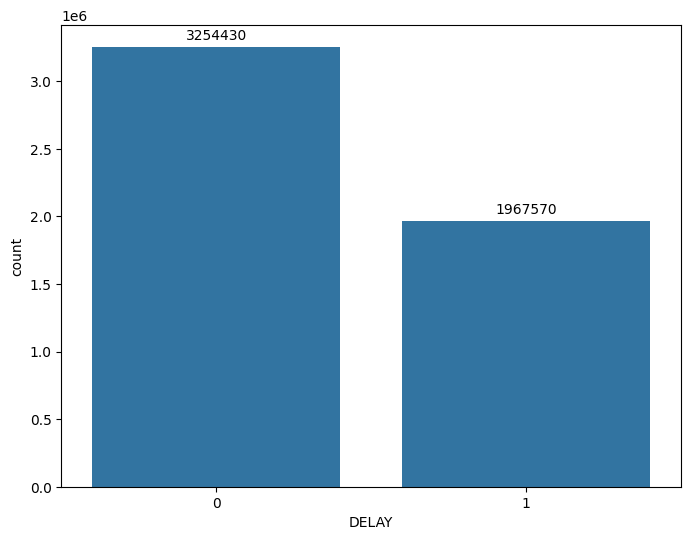

In [23]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.countplot(x="DELAY", data=flights_merged)
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", padding=3)
plt.show()

- Proporção: O grupo 0 (sem atraso) tem aproximadamente 3.25 milhões de voos.
- Atrasos: O grupo 1 (com atraso) tem cerca de 1.96 milhões.
- Quase 40% dos voos atrasaram


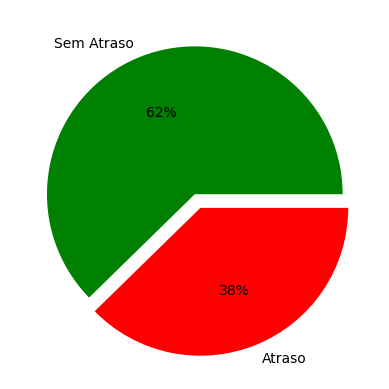

In [24]:
categororias = ["Sem Atraso", "Atraso"]
plt.pie(
    flights_merged["DELAY"].value_counts(),
    labels=categororias,
    autopct="%.0f%%",
    explode=(0, 0.1),
    colors=("g", "r"),
)
plt.show()

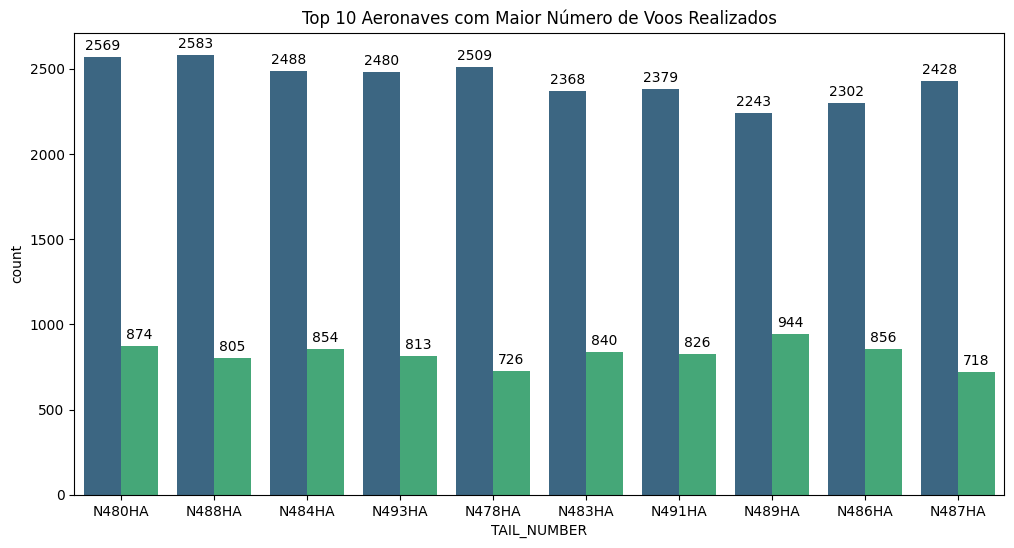

In [25]:
top_10_lista = flights_merged["TAIL_NUMBER"].value_counts().head(10).index
df_top_10 = flights_merged[flights_merged["TAIL_NUMBER"].isin(top_10_lista)]

plt.figure(figsize=(12, 6))
ax = sns.countplot(
    x="TAIL_NUMBER",
    data=df_top_10,
    order=top_10_lista,
    hue="DELAY",
    legend=False,
    palette="viridis",
)

for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", padding=3)

plt.title("Top 10 Aeronaves com Maior Número de Voos Realizados")
plt.show()

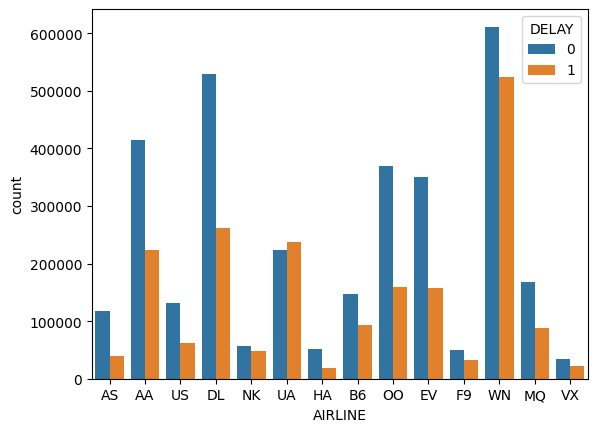

In [26]:
sns.countplot(x="AIRLINE", hue="DELAY", data=flights_merged)
plt.show()

- Southwest Airlines Co. -> Possui a Maior quantidade de Voos Atrasados e sem Atraso
- United Air Lines Inc. -> única que possui mais atrasos do que não atrasos


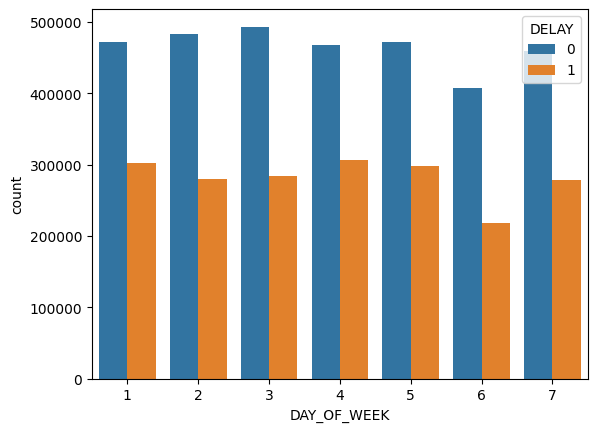

In [27]:
DiaDaSemana = list(range(1, 8))
sns.countplot(
    x="DAY_OF_WEEK", hue="DELAY", data=flights_merged, order=DiaDaSemana
)
plt.show()

- Não há concentração de atrasos em um dia da semana especifico


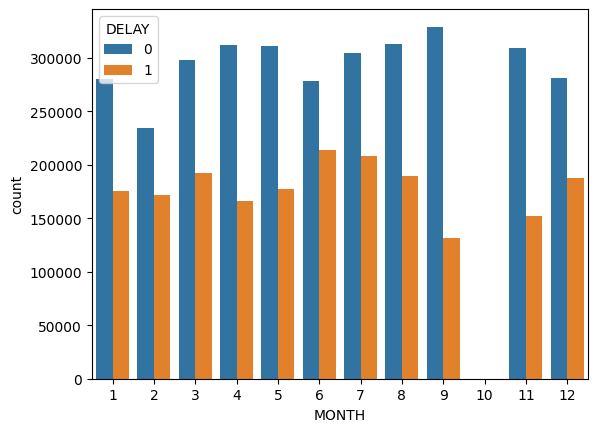

In [28]:
Meses = list(range(1, 13))
sns.countplot(x="MONTH", hue="DELAY", data=flights_merged, order=Meses)
plt.show()

- Outubro -> troca do código IATA para DOT
- Junho -> Caem os voos dentro do horário e aumentam os atrasos


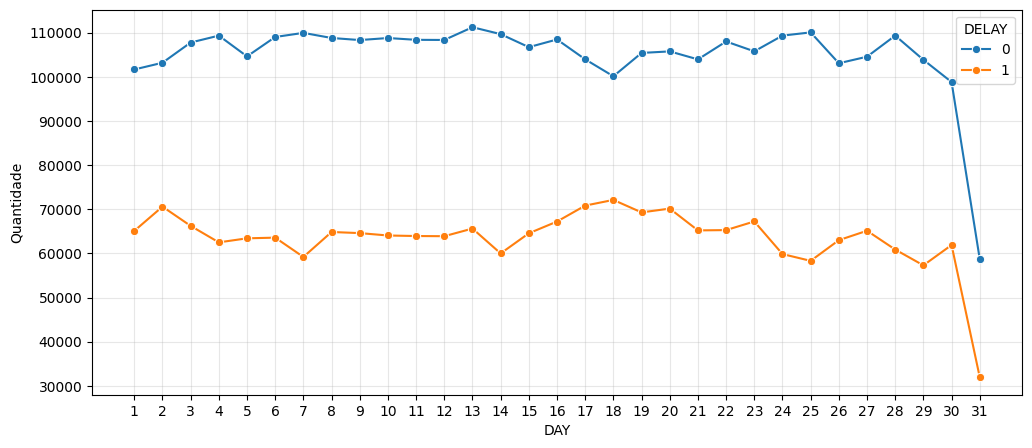

In [29]:
fig, ax = plt.subplots(figsize=(12, 5))
DiaDoMes = (
    flights_merged.groupby(["DAY", "DELAY"])
    .size()
    .reset_index(name="Quantidade")
)

sns.lineplot(x="DAY", y="Quantidade", hue="DELAY", data=DiaDoMes, marker="o")

plt.xticks(range(1, 32))
plt.grid(True, alpha=0.3)

plt.show()

#### Proporção Constante de Atrasos

- Correlação Visual: As duas linhas tendem a se mover juntas (quando uma sobe levemente, a outra também sobe).
- o atraso não é causado por "dias ruins" isolados no mês, mas é uma característica sistêmica da operação.
- Há um leve aumento na linha laranja por volta dos dias 17 a 20.
- Esses pequenos picos podem representar períodos de maior demanda ou congestionamento recorrente em determinados ciclos do mês.
- Embora a variação seja pequena comparada ao volume total, são esses os pontos onde a eficiência da malha aérea é mais testada.
